# chromosome level, read count, observe vs expect (heatmap)

In [2]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
# from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# read counts / mappable length ratio

In [3]:
name_list_2reps = [
    ['Npm2a-1k-2N_20221209', '1k-cell, 2N, rep1'],
    ['Npm2a-1k-2N_20221216', '1k-cell, 2N, rep2'],
    ['Npm2a-1k-4N_20221209', '1k-cell, 4N, rep1'],
    ['Npm2a-1k-4N_20221216', '1k-cell, 4N, rep2'],
    ['Npm2a-256-2N_20221209', '256-cell, 2N, rep1'],
    ['Npm2a-256-2N_20221216', '256-cell, 2N, rep2'],
    ['Npm2a-256-4N_20221209', '256-cell, 4N, rep1'],
    ['Npm2a-256-4N_20221216', '256-cell, 4N, rep2'],
    ['Npm2a-4-5h-1-2N_20221216', '4.5 hpf, 2N, rep1'],
    ['Npm2a-4-5h-1-4N_20221216', '4.5 hpf, 4N, rep1'],
    ['Npm2a-4-5h-2-2N_20221216', '4.5 hpf, 2N, rep2'],
    ['Npm2a-4-5h-2-4N_20221216', '4.5 hpf, 4N, rep2'],
    ['Npm2a-5-5h-1-2N_20221209', '5.5 hpf, 2N, rep1'],
    ['Npm2a-5-5h-1-4N_20221209', '5.5 hpf, 4N, rep1'],
    ['Npm2a-5-5h-2-2N_20221209', '5.5 hpf, 2N, rep2'],
    ['Npm2a-5-5h-2-4N_20221209', '5.5 hpf, 4N, rep2'],
]

In [4]:
### !!! not extract balck list length yet

## read counts of each chromosome

In [5]:
### read counts
os.chdir(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/2_signal')
chrom_readcnt_df = pd.DataFrame()
for i,names in enumerate(name_list_2reps) :
    df = pd.read_csv(f'{names[0]}_chromosome_distribution.txt', sep = "\t", header = 0, names = ['chr', names[1]])
    if i == 0 :
        chrom_readcnt_df = df
    else :
        chrom_readcnt_df = pd.merge(chrom_readcnt_df, df, on = 'chr')
        
chrom_readcnt_df_eu = chrom_readcnt_df.loc[~chrom_readcnt_df['chr'].isin(['.', 'chrM'])]
chrom_readcnt_df_eu['chr_num'] = chrom_readcnt_df_eu['chr'].copy().str.split('r', expand = True)[1].astype(int).to_list()
chrom_readcnt_df_eu = chrom_readcnt_df_eu.sort_values(['chr_num'])
chrom_readcnt_df_eu = chrom_readcnt_df_eu.set_index('chr')
chrom_readcnt_df_eu

/tmp/ipykernel_17941/1692785143.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_readcnt_df_eu['chr_num'] = chrom_readcnt_df_eu['chr'].copy().str.split('r', expand = True)[1].astype(int).to_list()


,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2",chr_num
chr,,,,,,,,,,,,,,,,,
chr1,574101,891188,282620,1229118,140331,785947,483629,857425,2522679,963875,837736,1523863,305273,43960,350100,680947,1
chr2,371503,595443,595435,889285,327424,452360,597484,681780,1689379,786391,1510449,1121932,298564,743291,277883,113495,2
chr3,313504,1126591,682264,954631,136298,714811,549669,651941,323781,1063641,516858,1188131,156834,36588,105357,97979,3
chr4,396144,445051,635256,890904,304459,567003,459724,719516,347516,832532,718091,1073295,145889,38753,245868,111582,4
chr5,341967,731296,684280,1220576,208578,643944,650417,733846,1429885,1057069,879673,1244026,188445,704482,158740,91447,5
chr6,466002,838769,428857,894008,1445373,899332,543005,748652,432950,896538,967275,1207864,272839,1364750,449185,170161,6
chr7,333769,539202,750723,1094927,284953,720220,368093,780140,412497,1191024,750365,1442802,133917,742152,242348,319267,7
chr8,443795,528349,436861,735387,468333,332594,559298,725630,405016,743459,382399,982445,444375,198148,249145,101005,8
chr9,301311,464206,451519,770187,144038,1267831,323385,712943,525420,936829,735242,1154286,267289,42503,225304,266984,9


## chrom size weight

In [6]:
chrom_size = pd.DataFrame.from_dict({'chr1': 59578282,
 'chr10': 45420867,
 'chr11': 45484837,
 'chr12': 49182954,
 'chr13': 52186027,
 'chr14': 52660232,
 'chr15': 48040578,
 'chr16': 55266484,
 'chr17': 53461100,
 'chr18': 51023478,
 'chr19': 48449771,
 'chr2': 59640629,
 'chr20': 55201332,
 'chr21': 45934066,
 'chr22': 39133080,
 'chr23': 46223584,
 'chr24': 42172926,
 'chr25': 37502051,
 'chr3': 62628489,
 'chr4': 74498832,
 'chr5': 72500376,
 'chr6': 60270059,
 'chr7': 74282399,
 'chr8': 54304671,
 'chr9': 56459846,
#  'chrM': 16596
 }, 
    orient='index', columns=['chr_len'])
chrom_size['chrom_len_ratio'] = chrom_size.apply(lambda x : x /sum(x))

# total_base_num = chrom_size[0].sum()
chrom_size

,chr_len,chrom_len_ratio
chr1,59578282,0.044411
chr10,45420867,0.033858
chr11,45484837,0.033906
chr12,49182954,0.036662
chr13,52186027,0.038901
chr14,52660232,0.039255
chr15,48040578,0.035811
chr16,55266484,0.041197
chr17,53461100,0.039852
chr18,51023478,0.038034


In [7]:
chrom_readcnt_df_eu_ratio = pd.merge(chrom_readcnt_df_eu, chrom_size, left_index = True, right_index = True)
chrom_readcnt_df_eu_ratio_weightedByChrLen = chrom_readcnt_df_eu_ratio.iloc[:, 0:16].apply(lambda x : x / sum(x))
chrom_readcnt_df_eu_ratio_weightedByChrLen['chrom_len_ratio'] = chrom_readcnt_df_eu_ratio['chrom_len_ratio']
chrom_readcnt_df_eu_ratio_weightedByChrLen = chrom_readcnt_df_eu_ratio_weightedByChrLen.apply(lambda x : x / x['chrom_len_ratio'], axis = 1).drop('chrom_len_ratio', axis = 1)
chrom_readcnt_df_eu_ratio_weightedByChrLen

,"1k-cell, 2N, rep1","1k-cell, 2N, rep2","1k-cell, 4N, rep1","1k-cell, 4N, rep2","256-cell, 2N, rep1","256-cell, 2N, rep2","256-cell, 4N, rep1","256-cell, 4N, rep2","4.5 hpf, 2N, rep1","4.5 hpf, 4N, rep1","4.5 hpf, 2N, rep2","4.5 hpf, 4N, rep2","5.5 hpf, 2N, rep1","5.5 hpf, 4N, rep1","5.5 hpf, 2N, rep2","5.5 hpf, 4N, rep2"
chr1,1.055849,1.016175,0.546393,1.216972,0.287792,1.148271,0.785674,1.107857,3.194338,0.936167,0.969542,1.155408,0.869732,0.154866,0.748354,1.675598
chr2,0.682530,0.678243,1.149959,0.879577,0.670783,0.660209,0.969622,0.879990,2.136937,0.762987,1.746269,0.849771,0.849728,2.615784,0.593366,0.278984
chr3,0.548495,1.222029,1.254789,0.899163,0.265908,0.993479,0.849469,0.801331,0.390020,0.982751,0.569045,0.856979,0.425063,0.122617,0.214237,0.229354
chr4,0.582646,0.405833,0.982176,0.705434,0.499336,0.662484,0.597263,0.743475,0.351911,0.646654,0.664626,0.650799,0.332398,0.109180,0.420296,0.219578
chr5,0.516827,0.685236,1.087136,0.993115,0.351513,0.773120,0.868300,0.779184,1.487879,0.843691,0.836620,0.775116,0.441194,2.039459,0.278836,0.184916
chr6,0.847203,0.945427,0.819598,0.875013,2.930165,1.298846,0.872008,0.956211,0.541930,0.860771,1.106613,0.905303,0.768404,4.752660,0.949132,0.413907
chr7,0.492336,0.493120,1.164083,0.869509,0.468707,0.843954,0.479612,0.808467,0.418930,0.927802,0.696520,0.877401,0.306009,2.096970,0.415486,0.630105
chr8,0.895461,0.660954,0.926609,0.798829,1.053735,0.533110,0.996837,1.028617,0.562655,0.792210,0.485542,0.817238,1.388984,0.765839,0.584276,0.272678
chr9,0.584759,0.558545,0.921142,0.804695,0.311710,1.954614,0.554368,0.972055,0.702059,0.960155,0.897920,0.923531,0.803575,0.158003,0.508197,0.693250
chr10,0.805962,1.083627,0.673861,1.340439,0.320071,0.813193,1.107049,1.220189,2.328171,1.355581,1.601319,1.225820,0.315108,0.205382,0.683545,0.407284


In [8]:
### mappable length ratio (black list have not exclude yet)

In [9]:
stage_order = {
    '256-cell' : 0,
    '1k-cell' : 1,
    '4.5 hpf' : 2,
    '5.5 hpf' : 3
}

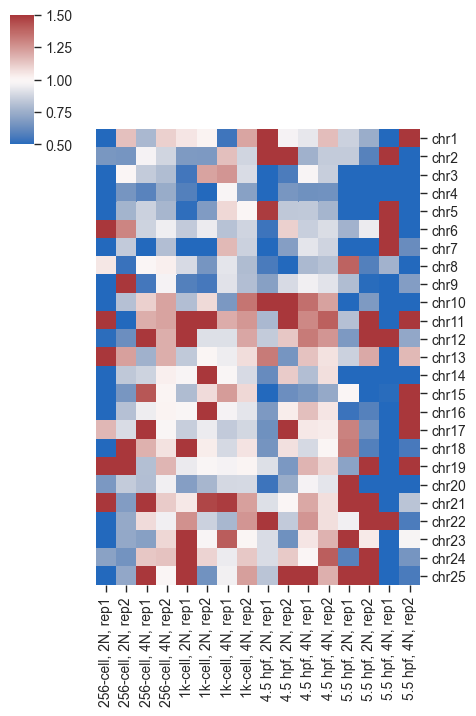

In [16]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = chrom_readcnt_df_eu_ratio_weightedByChrLen.copy().T
    plot_df['names'] = plot_df.index
    plot_df['4N / 2N'] = plot_df['names'].str.split(', ', expand = True)[1]
    plot_df['stage'] = plot_df['names'].str.split(', ', expand = True)[0]
    plot_df['stage-nuclear'] = plot_df['stage'] + ' ' + plot_df['4N / 2N']
    plot_df['stage_order'] = [stage_order[x] for x in plot_df['stage']]
    plot_df = plot_df.sort_values(['4N / 2N', 'stage_order'][::-1])
    # plot_df_log2 = plot_df.iloc[:,:-5].apply(lambda x : np.log2(x))

    
    # lut = dict(zip(plot_df['4N / 2N'].unique(), ['#739C90', '#2E765E']))
    # row_colors = plot_df['4N / 2N'].map(lut)
    
    c = sns.clustermap(
        plot_df.iloc[:, :-5].T,
        col_cluster = False,
        row_cluster = False,
        cmap="vlag",
#         cmap="Reds",
        vmin = 0.5,
        vmax = 1.5,
        figsize = (6.4 * .75, 4.8 * 1.5),
#         z_score = 0,
        # row_colors = row_colors
    )

    c.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make2_heastmap_chrom_count_observeVSexpect.pdf', 
              transparent = True)

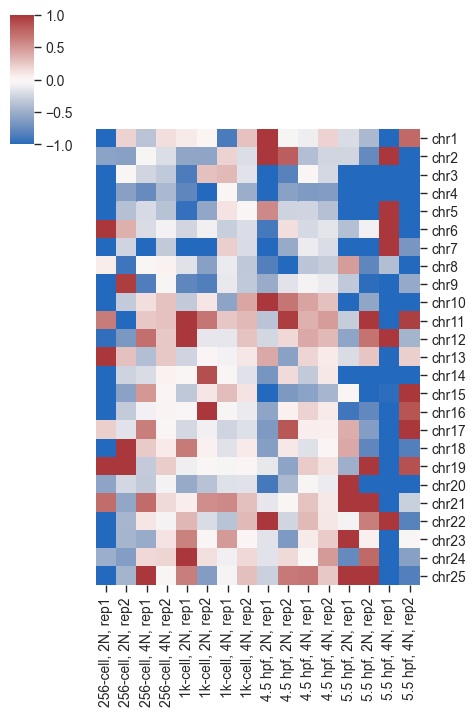

In [62]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = chrom_readcnt_df_eu_ratio_weightedByChrLen.copy().T
    plot_df['names'] = plot_df.index
    plot_df['4N / 2N'] = plot_df['names'].str.split(', ', expand = True)[1]
    plot_df['stage'] = plot_df['names'].str.split(', ', expand = True)[0]
    plot_df['stage-nuclear'] = plot_df['stage'] + ' ' + plot_df['4N / 2N']
    plot_df['stage_order'] = [stage_order[x] for x in plot_df['stage']]
    plot_df = plot_df.sort_values(['4N / 2N', 'stage_order'][::-1])
    plot_df_log2 = plot_df.iloc[:,:-5].apply(lambda x : np.log2(x))

    
    # lut = dict(zip(plot_df['4N / 2N'].unique(), ['#739C90', '#2E765E']))
    # row_colors = plot_df['4N / 2N'].map(lut)
    
    c = sns.clustermap(
        plot_df_log2.T,
        col_cluster = False,
        row_cluster = False,
        cmap="vlag",
#         cmap="Reds",
        vmin = -1,
        vmax = 1,
        figsize = (6.4 * .75, 4.8 * 1.5),
#         z_score = 0,
        # row_colors = row_colors
    )

    c.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make2_heastmap_chrom_count_observeVSexpect_log2.pdf', 
              transparent = True)

In [60]:
df

,index,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,...,chr17,chr18,chr19,chr20,chr21,chr22,chr23,chr24,chr25,4N / 2N
0,"256-cell, 2N, rep1",-1.796899,-0.576082,-1.911001,-1.001916,-1.508348,1.550982,-1.093243,0.075512,-1.681722,...,0.224802,-1.203880,2.842045,-0.570004,0.725624,-1.794479,-1.238666,-0.493187,-1.616085,2N
1,"256-cell, 2N, rep2",0.199464,-0.599006,-0.009439,-0.594043,-0.371235,0.377231,-0.244765,-0.907496,0.966884,...,-0.150333,1.624080,1.172375,-0.231885,-0.539896,-0.440598,-0.451903,-0.615835,-0.460053,2N
4,"1k-cell, 2N, rep1",0.078403,-0.551036,-0.866450,-0.779308,-0.952246,-0.239220,-1.022285,-0.159298,-0.774087,...,-0.221801,0.650047,-0.086707,-0.521043,0.066266,0.340260,0.612810,1.232985,0.635707,2N
5,"1k-cell, 2N, rep2",0.023149,-0.560126,0.289279,-1.301041,-0.545327,-0.080962,-1.019989,-0.597379,-0.840254,...,-0.078549,0.053897,-0.012160,-0.359412,0.548640,-0.202438,-0.027917,0.138245,-0.624498,2N
8,"4.5 hpf, 2N, rep1",1.675517,1.095545,-1.358382,-1.506719,0.573258,-0.883822,-1.255218,-0.829678,-0.510335,...,-0.633318,-0.606598,-0.131887,-0.884567,-0.135252,1.290362,-0.148703,-0.148627,-0.272967,2N
9,"4.5 hpf, 2N, rep2",-0.044625,0.804276,-0.813386,-0.589386,-0.257356,0.146150,-0.521762,-1.042332,-0.155341,...,0.840171,0.097305,-0.566115,-0.426231,-0.007632,-0.241671,-0.633128,0.166761,0.661517,2N
12,"5.5 hpf, 2N, rep1",-0.201358,-0.234927,-1.234252,-1.589018,-1.180516,-0.380063,-1.708353,0.474030,-0.315496,...,0.386401,0.408968,-0.484840,0.996735,1.384094,-0.060518,1.010218,-0.756672,2.238764,2N
13,"5.5 hpf, 2N, rep2",-0.418206,-0.753005,-2.222720,-1.250521,-1.842510,-0.075319,-1.267127,-0.775278,-0.976539,...,-0.612224,-0.778425,1.056358,-1.461766,1.033743,0.637652,0.061365,0.738034,2.447270,2N


## standard deviation

In [75]:
sd_df = plot_df_log2.copy()
sd_df['sd'] = sd_df.apply(lambda x : x.std(), axis=1)
sd_df['4N / 2N'] = sd_df.reset_index()['index'].str.split(', ', expand = True)[1].tolist()
sd_df['stage'] = sd_df.reset_index()['index'].str.split(', ', expand = True)[0].tolist()
sd_df

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr19,chr20,chr21,chr22,chr23,chr24,chr25,sd,4N / 2N,stage
"256-cell, 2N, rep1",-1.796899,-0.576082,-1.911001,-1.001916,-1.508348,1.550982,-1.093243,0.075512,-1.681722,-1.643534,...,2.842045,-0.570004,0.725624,-1.794479,-1.238666,-0.493187,-1.616085,1.262693,2N,256-cell
"256-cell, 2N, rep2",0.199464,-0.599006,-0.009439,-0.594043,-0.371235,0.377231,-0.244765,-0.907496,0.966884,-0.298330,...,1.172375,-0.231885,-0.539896,-0.440598,-0.451903,-0.615835,-0.460053,0.637817,2N,256-cell
"256-cell, 4N, rep1",-0.347996,-0.044506,-0.235367,-0.743561,-0.203734,-0.197587,-1.060061,-0.004570,-0.851083,0.146719,...,-0.300594,-0.311708,0.728061,0.112725,-0.513695,0.178116,1.179370,0.523072,4N,256-cell
"256-cell, 4N, rep2",0.147772,-0.184442,-0.319530,-0.427643,-0.359964,-0.064599,-0.306740,0.040705,-0.040891,0.287105,...,0.229952,-0.057959,0.164180,-0.061434,0.124827,0.190544,-0.006645,0.205363,4N,256-cell
"1k-cell, 2N, rep1",0.078403,-0.551036,-0.866450,-0.779308,-0.952246,-0.239220,-1.022285,-0.159298,-0.774087,-0.311216,...,-0.086707,-0.521043,0.066266,0.340260,0.612810,1.232985,0.635707,0.637505,2N,1k-cell
"1k-cell, 2N, rep2",0.023149,-0.560126,0.289279,-1.301041,-0.545327,-0.080962,-1.019989,-0.597379,-0.840254,0.115868,...,-0.012160,-0.359412,0.548640,-0.202438,-0.027917,0.138245,-0.624498,0.590333,2N,1k-cell
"1k-cell, 4N, rep1",-0.871989,0.201582,0.327445,-0.025946,0.120532,-0.287011,0.219194,-0.109968,-0.118505,-0.569477,...,-0.045080,-0.169587,0.571951,-0.352145,0.488517,-0.079361,-0.054363,0.314927,4N,1k-cell
"1k-cell, 4N, rep2",0.283296,-0.185119,-0.153345,-0.503417,-0.009967,-0.192623,-0.201727,-0.324042,-0.313486,0.422706,...,0.012388,-0.162191,0.298132,0.326568,0.001177,0.173325,0.299350,0.247865,4N,1k-cell
"4.5 hpf, 2N, rep1",1.675517,1.095545,-1.358382,-1.506719,0.573258,-0.883822,-1.255218,-0.829678,-0.510335,1.219197,...,-0.131887,-0.884567,-0.135252,1.290362,-0.148703,-0.148627,-0.272967,0.870407,2N,4.5 hpf
"4.5 hpf, 2N, rep2",-0.044625,0.804276,-0.813386,-0.589386,-0.257356,0.146150,-0.521762,-1.042332,-0.155341,0.679261,...,-0.566115,-0.426231,-0.007632,-0.241671,-0.633128,0.166761,0.661517,0.553986,2N,4.5 hpf


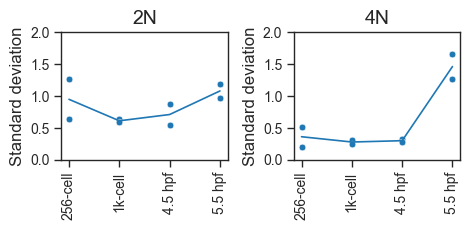

In [78]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1, 2, figsize = (6.4 * .75, 4.8 * .5), tight_layout = True)
    for i,N in enumerate(['2N', '4N']) :
        ax = axes[i]
        sns.lineplot(
            data = sd_df.loc[sd_df['4N / 2N'] == N],
            x = 'stage',
            y = 'sd',
            ax = ax,
            ci = None,
            palette = 'Set1',
            # marker = 'o',
            # err_style = 'bars',
        )
        
        sns.scatterplot(
            data = sd_df.loc[sd_df['4N / 2N'] == N],
            x = 'stage',
            y = 'sd',
            ax = ax,
            ci = None,
            palette = 'Set1',
            # marker = 'o',
            # err_style = 'bars',
        )
        ax.set_title(N)
        ax.set_ylabel('Standard deviation')
        ax.set_xlabel('')
        ax.set_ylim(0, 2)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf'], rotation = 90)
        
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make2_line_sd_chrom_count_observeVSexpect.pdf',
                transparent=True)